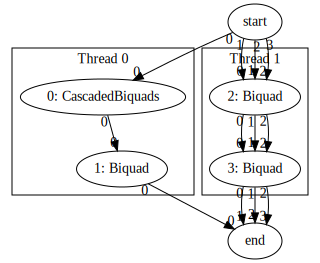

In [1]:
from audio_dsp.design.pipeline import Pipeline
from audio_dsp.stages.biquad import Biquad
from audio_dsp.stages.cascaded_biquads import CascadedBiquads

# 4 inputs
p = Pipeline(4)

with p.add_thread() as t:
    ch00, ch01 = t.stages((CascadedBiquads, Biquad), p.i[:1])

with p.add_thread() as t:
    ch10, ch11 = t.stages((Biquad, Biquad), p.i[1:])



p.set_outputs([*ch01.o, *ch11.o])
p.draw()


In [ ]:
import time
from audio_dsp.design.pipeline import generate_dsp_main
generate_dsp_main(p)
# !cmake --build build -j
#!xrun bin/2AMi2o2xxxxxx/app_usb_aud_xk_evk_xu316_dsp_2AMi2o2xxxxxx.xe
# time.sleep(5)

In [ ]:
# do tuning
ch00.make_lowpass(12000, 0.7)
ch01.make_highpass(8000, 0.7)
ch10.make_lowpass(19000, 0.7)
ch11.make_highpass(3000, 0.7)
from audio_dsp.design.pipeline import send_config_to_device
send_config_to_device(p, "host_cmd_map/build/xvf_host.exe")